In [ ]:
import pandas as pd
import networkx as nx


ppi_data = pd.read_csv("/content/Human_PPI.csv", skiprows=1)


ppi_data.head()


,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,1810055G02Rik,MPRIP
1,1810055G02Rik,RAI14
2,1810055G02Rik,TPM1
3,2810046L04Rik,ARF1
4,2810046L04Rik,ARF3


In [ ]:

G = nx.from_pandas_edgelist(ppi_data, 'OFFICIAL_SYMBOL_A', 'OFFICIAL_SYMBOL_B')

# Calculate the degree for each node
degrees = [val for (node, val) in G.degree()]




degrees[:20]




[3, 15, 15, 15, 2, 33, 15, 1, 20, 6, 2, 119, 3, 5, 4, 4, 9, 39, 6, 88]

In [ ]:
# # Calculate the clustering coefficient for each node
clustering_coeffs = nx.clustering(G)
type(clustering_coeffs)


list(clustering_coeffs.items())[:20]

[('1810055G02Rik', 0),
 ('MPRIP', 0.13333333333333333),
 ('RAI14', 0.12380952380952381),
 ('TPM1', 0.10256410256410256),
 ('2810046L04Rik', 0),
 ('ARF1', 0.06451612903225806),
 ('ARF3', 0.09523809523809523),
 ('4922501C03Rik', 0),
 ('CPNE4', 0),
 ('4930572J05Rik', 0),
 ('C8orf55', 0),
 ('PRKDC', 0.0816386678455644),
 ('SPRR2B', 0),
 ('SPRR2D', 0),
 ('SPRR2E', 0),
 ('SPRR2G', 0),
 ('9830001H06Rik', 0.1388888888888889),
 ('C1QBP', 0.07017543859649122),
 ('CCDC165', 0.06666666666666667),
 ('DYNLL1', 0.016415868673050615)]

In [ ]:

# # Calculate the average clustering coefficient for the network
average_clustering = nx.average_clustering(G)
average_clustering

0.20981150204746637

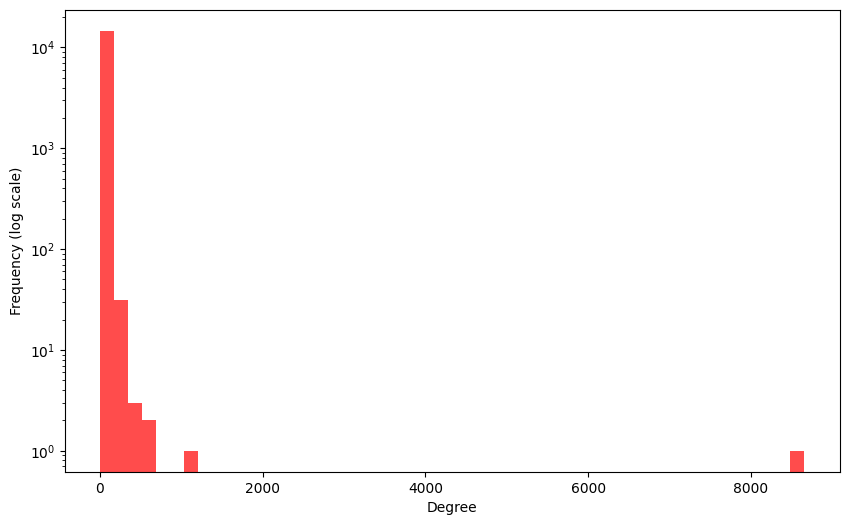

In [ ]:
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, log=True, color='red', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.show()


The degree distribution plot of the human protein interaction network suggests a scale-free nature, characterized by a heavy-tailed distribution where most proteins have low degrees, but a few act as highly connected hubs. The logarithmic scale highlights these hubs by making the long tail of the distribution more visible. The appearance of the plot, with a slow decay, visually indicates a power-law-like decay, typical for scale-free networks. This pattern is consistent with many biological networks where hubs play crucial roles in network functionality.

---QUESTION_2---
Write a script to calculate the shortest path lengths between every pair of nodes (proteins) in the attached files. Then, compare the path length distributions between two protein sets using a Wilcox test.

In [ ]:

protein_list1 = pd.read_csv("/content/protein_list1.csv")
protein_list2 = pd.read_csv("/content/protein_list2.csv")


protein_list1.head(), protein_list2.head()



(   Column1
 0    LAS1L
 1    FKBP4
 2     RBM6
 3     UPF1
 4  SLC25A5,
   Column1
 0   GNL3L
 1    FMR1
 2   FRAXA
 3    UBA1
 4   CSTF2)

In [ ]:
ppi_data

,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,1810055G02Rik,MPRIP
1,1810055G02Rik,RAI14
2,1810055G02Rik,TPM1
3,2810046L04Rik,ARF1
4,2810046L04Rik,ARF3
...,...,...
80065,vpr,VprBP
80066,vpu,BST2
80067,vpu,BTRC
80068,vpu,UBC


In [ ]:
protein_list1 = pd.read_csv("protein_list1.csv")
protein_list2 = pd.read_csv("protein_list2.csv")


protein_list1.head(), protein_list2.head()

(   Column1
 0    LAS1L
 1    FKBP4
 2     RBM6
 3     UPF1
 4  SLC25A5,
   Column1
 0   GNL3L
 1    FMR1
 2   FRAXA
 3    UBA1
 4   CSTF2)

In [ ]:
list(G.nodes)[:20]

['1810055G02Rik',
 'MPRIP',
 'RAI14',
 'TPM1',
 '2810046L04Rik',
 'ARF1',
 'ARF3',
 '4922501C03Rik',
 'CPNE4',
 '4930572J05Rik',
 'C8orf55',
 'PRKDC',
 'SPRR2B',
 'SPRR2D',
 'SPRR2E',
 'SPRR2G',
 '9830001H06Rik',
 'C1QBP',
 'CCDC165',
 'DYNLL1']

In [ ]:
from itertools import combinations
import numpy as np


def calculate_shortest_paths(graph, protein_list):

    valid_proteins = [protein for protein in protein_list if protein in graph]

    protein_pairs = combinations(valid_proteins, 2)

    path_lengths = [nx.shortest_path_length(graph, pair[0], pair[1]) for pair in protein_pairs if nx.has_path(graph, pair[0], pair[1])]
    return path_lengths

# Convert protein lists to lists
pl1 = protein_list1['Column1'].tolist()
pl2 = protein_list2['Column1'].tolist()


paths_list1 = calculate_shortest_paths(G, pl1)
paths_list2 = calculate_shortest_paths(G, pl2)

# Display the average path length for each list as a basic check
(np.mean(paths_list1), np.mean(paths_list2))


paths_list1[:20],paths_list2[:20]

# x = len(paths_list1)
# y = len(paths_list2)

# x,y

([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from scipy.stats import wilcoxon


min_length = min(len(paths_list1), len(paths_list2))

# min_length
statistic_value, p_value = wilcoxon(paths_list1[:min_length], paths_list2[:min_length])

statistic_value, p_value


(896.0, 6.0999954580897106e-05)